# Punto 3 - Tarea 1 - Estadistica3_2023-2

Importaremos primero las librerías que vamos a usar

In [154]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import normaltest
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

Leeremos el dataset CARS.csv


In [155]:
df = pd.read_csv("data/CARS.csv")

In [105]:
#PRIMERA FORMA DE VERIFICAR QUE SI HAYA LEIDO CARS.csv
print(df.head())#muestra las primeras lineas del DataFrame

    Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  


In [106]:
#SEGUNDA FORMA DE VERIFICAR QUE SI HAYA LEIDO CARS.csv
print(df.info()) #Verifica info del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB
None


In [107]:
#VERIFICAMOS SI HAY VALORES NULOS
print(df.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


Podemos observar que en la columna **Cylinders** existen 2 valores nulos

In [108]:
#Para evitar que Cylinders continue con sus valores null
mediana_Cylinders = df['Cylinders'].median()
df['Cylinders'] = df['Cylinders'].fillna(mediana_Cylinders)

In [7]:
#como podemos observar ya no tenemos valores nulos en nuestro datos
print(df.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [109]:
#Para las variables númericas MSRP e Invoice se debe hacer este proceso:
#nos permite eliminar $ y el separador de miles.
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)
df["MSRP"] = df["MSRP"].replace('[\$,]', '', regex=True).astype(float)

## 3.1.1 Para las variables categóricas un gráfico de barras

Las variables categóricas son: Make, Type, Origin, DriveTrain, Model.

La variable categórica **Model** no se realizará al ser valor único.

Podemos hacer gráfico de barras empleando Plotly o matplotlib

Pero para este punto solo se mostrará el ejemplo en código en Plotly de uno solo,

(al parecer GIT no permite visualizar gráficos en plotly)


y los demás serán en matplotlib

In [110]:
#Plotly(en este caso llamamos plotly con px)
#categoria_counts = df['Origin'].value_counts()

#fig = px.bar(df, x=categoria_counts.index, y=categoria_counts.values, title='Origen')
#fig.update_traces(text=categoria_counts.values, textposition='outside')
#fig.update_layout(xaxis_title='Categoría', yaxis_title='Frecuencia')
#fig.show()

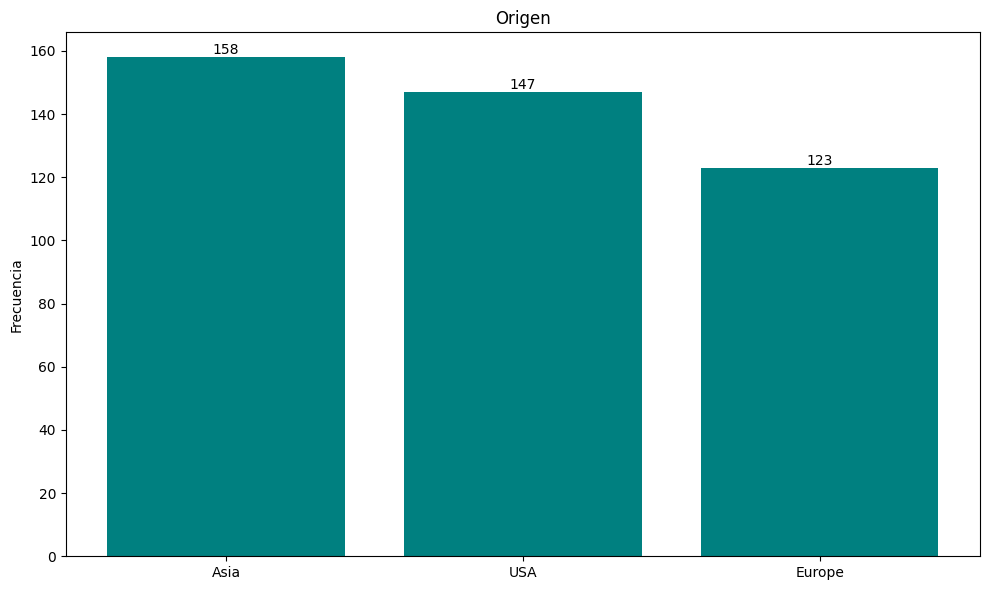

In [111]:
#Usando matplotlib
categoria_counts = df['Origin'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(categoria_counts.index, categoria_counts.values, color = "teal")

#Para poder mostrar la frecuencia con la que se repiten los datos sobre la barra 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

#Daremos nombre al titulo y los ejes
plt.title('Origen')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

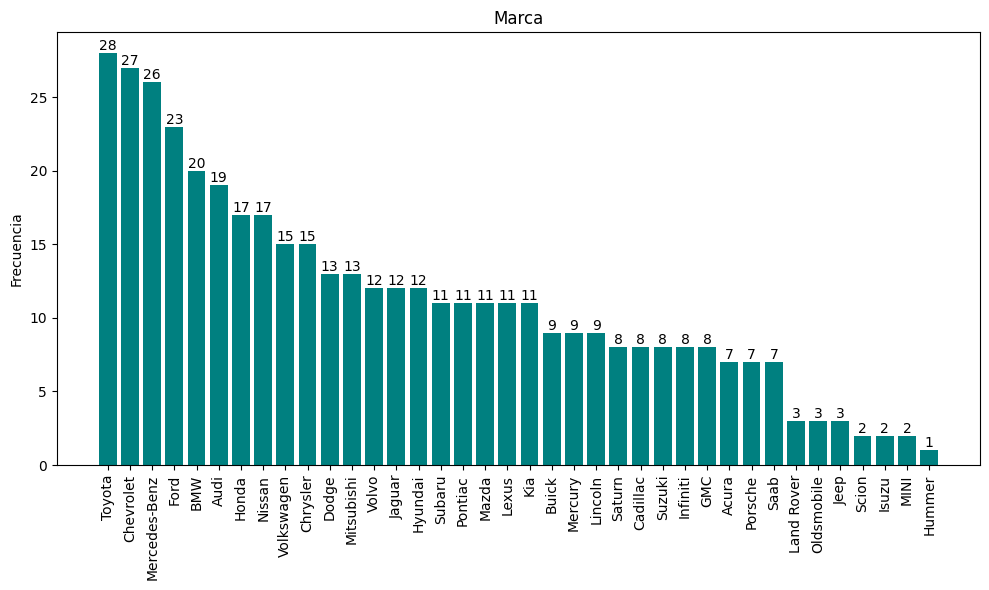

In [112]:
categoria_counts = df['Make'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(categoria_counts.index, categoria_counts.values,color = "teal")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.title('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)#Una rotación de los nombres en X para poderlos ver mejor
plt.tight_layout()
plt.show()

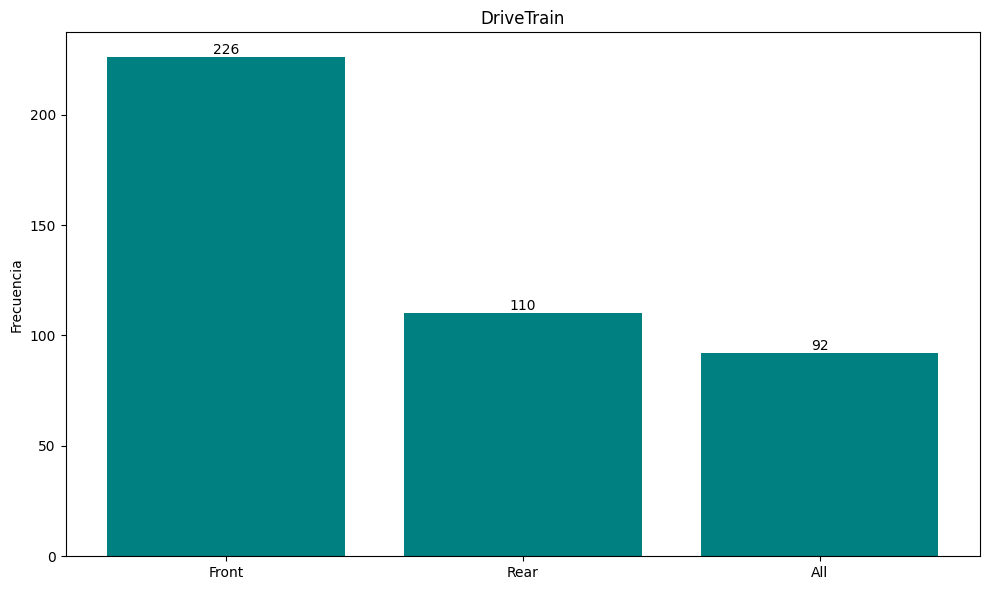

In [113]:
categoria_counts = df['DriveTrain'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(categoria_counts.index, categoria_counts.values,color = "teal")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.title('DriveTrain')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

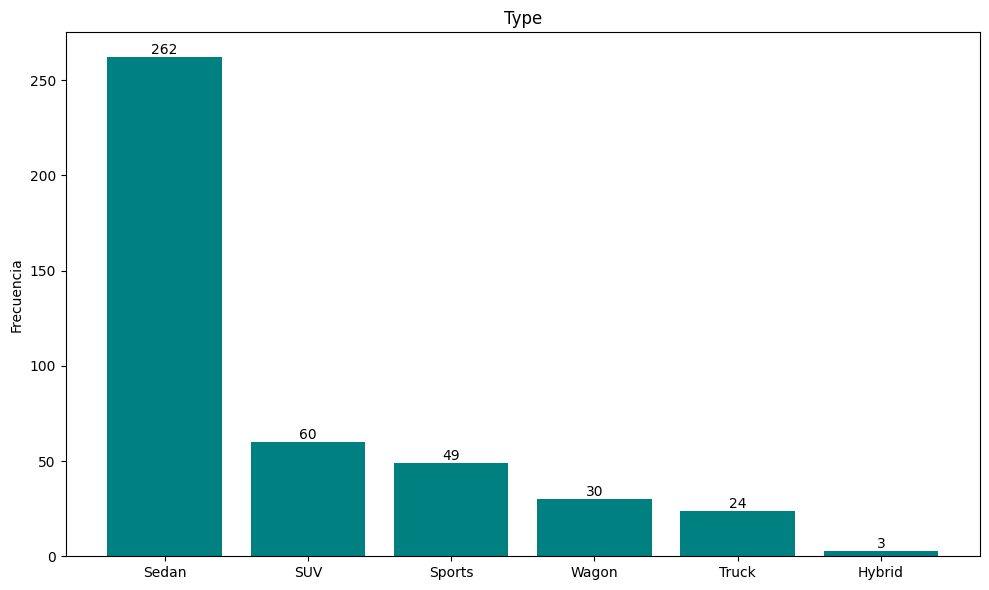

In [114]:
categoria_counts = df['Type'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(categoria_counts.index, categoria_counts.values,color = "teal")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.title('Type')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## 3.1.2 Para las variables numéricas crear histogramas. 

Identificaremos primero cuales son las variables numéricas que poseemos.

In [115]:
# Identificamos columnas numéricas
print("Columnas numéricas que se van a trabajar:")
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

Columnas numéricas que se van a trabajar:
['MSRP', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']


Realizamos los histogramas

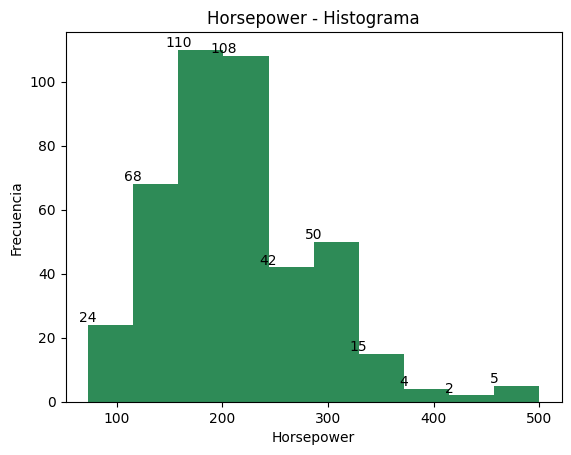

In [116]:
#Creamos el histograma con Bins=10 para facilidad de interpretación del gráfico.
hist = plt.hist(df["Horsepower"], bins=10, color='seagreen')
#Añadimos valores encima de las barras de la siguiente forma
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
    #Añadimos titulo al gráfico y a los ejes
plt.title('Horsepower - Histograma')
plt.xlabel('Horsepower')
plt.ylabel('Frecuencia')
plt.grid(False)#quitamos la cuadricula
plt.show()

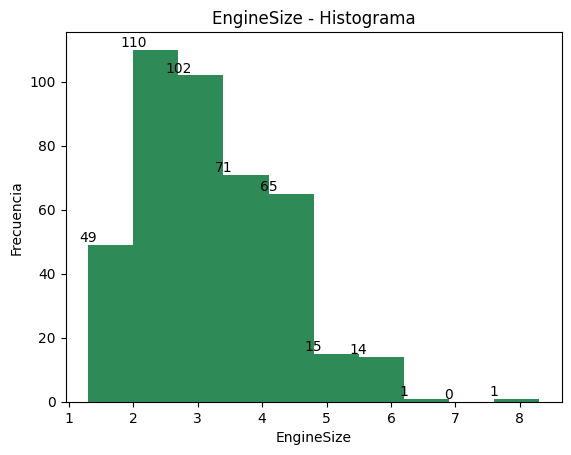

In [117]:
hist = plt.hist(df["EngineSize"], bins=10, color='seagreen')
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
plt.title('EngineSize - Histograma')
plt.xlabel('EngineSize')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

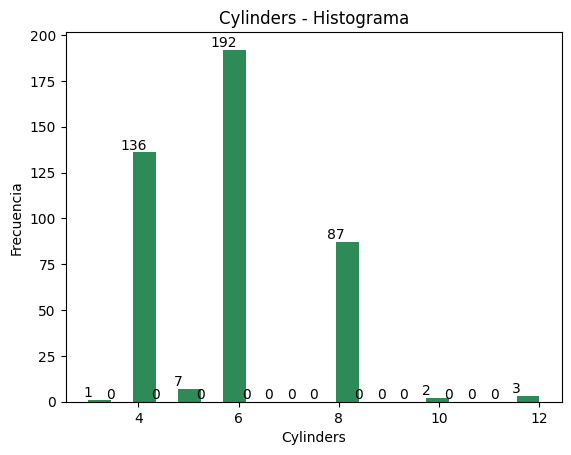

In [118]:
hist = plt.hist(df["Cylinders"], bins=20, color='seagreen')
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
plt.title('Cylinders - Histograma')
plt.xlabel('Cylinders')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

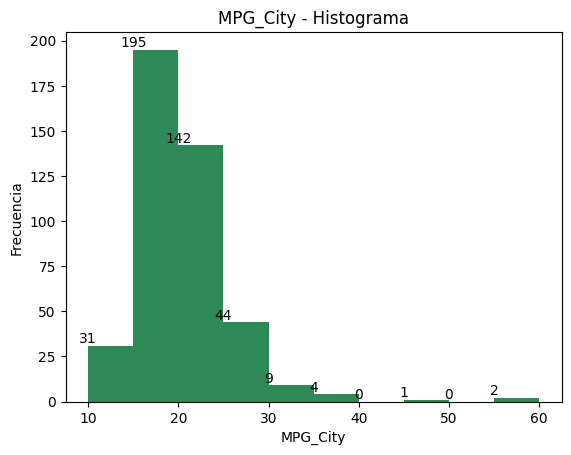

In [119]:
hist = plt.hist(df["MPG_City"], bins=10, color='seagreen')
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
plt.title('MPG_City - Histograma')
plt.xlabel('MPG_City')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

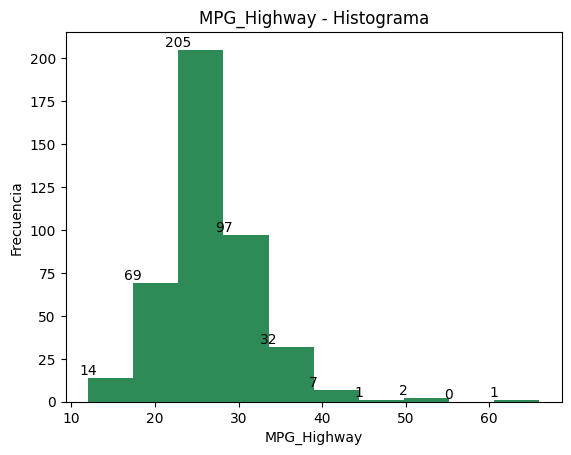

In [120]:
hist = plt.hist(df["MPG_Highway"], bins=10, color='seagreen')
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
plt.title('MPG_Highway - Histograma')
plt.xlabel('MPG_Highway')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

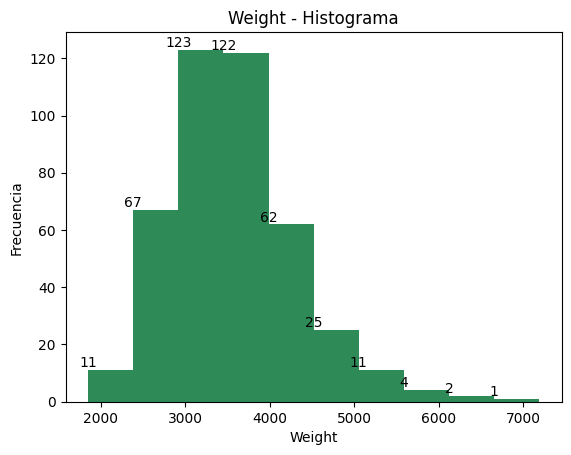

In [121]:
hist = plt.hist(df["Weight"], bins=10, color='seagreen')
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
plt.title('Weight - Histograma')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

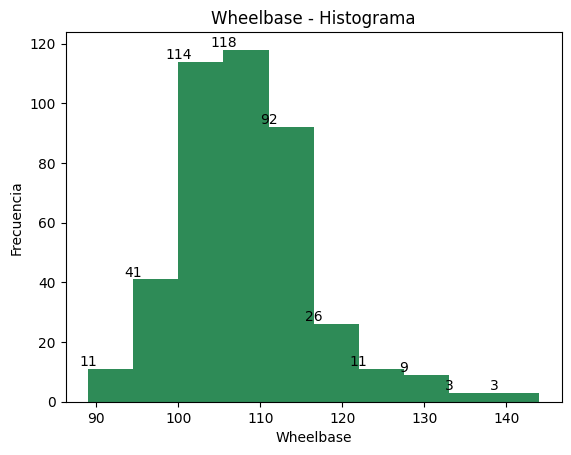

In [122]:
hist = plt.hist(df["Wheelbase"], bins=10, color='seagreen')
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
plt.title('Wheelbase - Histograma')
plt.xlabel('Wheelbase')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

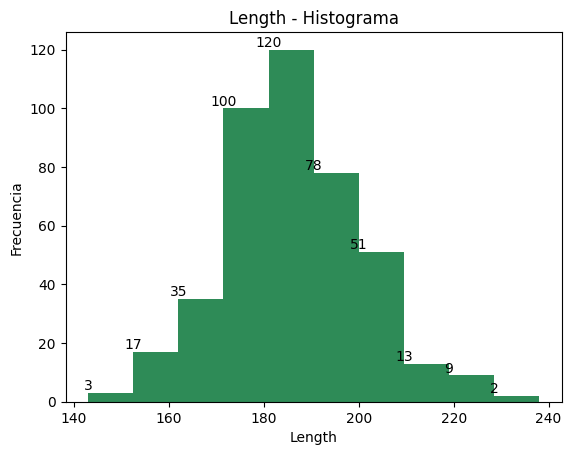

In [123]:
hist = plt.hist(df["Length"], bins=10, color='seagreen')
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
plt.title('Length - Histograma')
plt.xlabel('Length')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

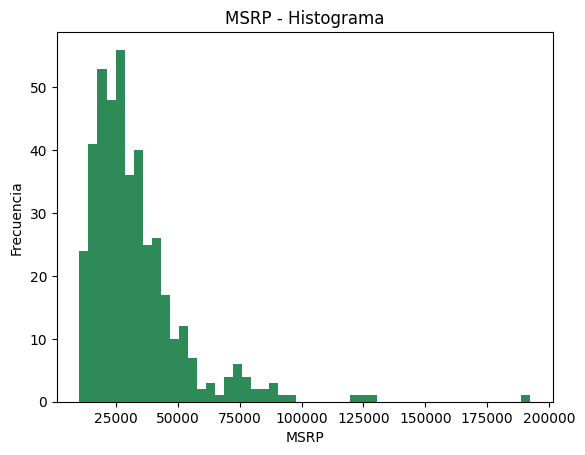

In [124]:
hist = plt.hist(df["MSRP"], bins=50, color='seagreen')
plt.title('MSRP - Histograma')
plt.xlabel('MSRP')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

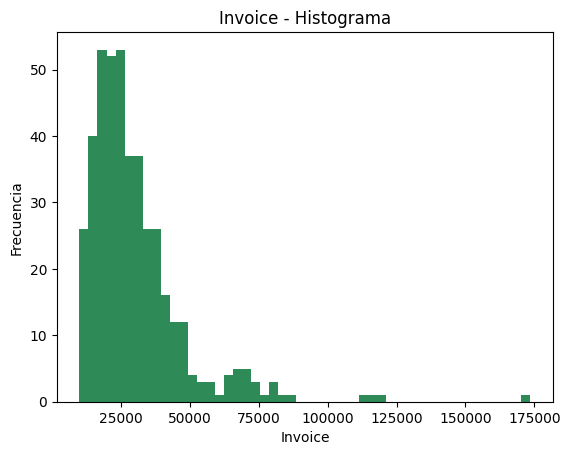

In [125]:
hist = plt.hist(df["Invoice"], bins=50, color='seagreen')
plt.title('Invoice - Histograma')
plt.xlabel('Invoice')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

## 3.1.2 Listar los modelos de carros que están más lejos de 5 estándares de desviación

In [126]:
#Defino las columnas numéricas que usaré

Columnas_numericas = [
    "EngineSize",
    "Cylinders",
    "Horsepower",
    "MPG_City",
    "MPG_Highway",
    "Weight",
    "Wheelbase",
    "Length"
]

In [127]:
#Calculo para encontrar los considerados outliers

#Estandarizamos los datos que vamos a usar (X1-MEDIAX1)/SIGMAX1
df_estandarizada = (df[Columnas_numericas] - df[Columnas_numericas].mean()) / df[Columnas_numericas].std()

#Revisamos si son > 5.0 o < -5.0
df_estandarizada.query(
               "(EngineSize > 5.0 or EngineSize < -5.0)"
               "or (Cylinders > 5.0 or Cylinders < -5.0)"
               "or (Horsepower > 5.0 or Horsepower < -5.0)"
               "or (MPG_City > 5.0 or MPG_City < -5.0)"
               "or (MPG_Highway > 5.0 or MPG_Highway < -5.0)"
               "or (Weight > 5.0 or Weight < -5.0)"
               "or (Wheelbase > 5.0 or Wheelbase < -5.0)"
               "or (Length > 5.0 or Length < -5.0)"
)

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
150,-1.079501,-1.806233,-1.989051,7.624588,6.820271,-2.276669,-1.582592,-2.184299
373,-1.530522,-1.163082,-1.473989,7.433684,4.207577,-0.906414,-0.259174,-0.791347


In [129]:
#Calculo para encontrar los considerados outliers USANDO .abs()
df_estandarizada = (df[Columnas_numericas] - df[Columnas_numericas].mean()) / df[Columnas_numericas].std()
outliers = df_estandarizada[
     (df_estandarizada["EngineSize"].abs() > 5.0)
    | (df_estandarizada["Cylinders"].abs() > 5.0)
    | (df_estandarizada["Horsepower"].abs() > 5.0)
    | (df_estandarizada["MPG_City"].abs() > 5.0)
    | (df_estandarizada["MPG_Highway"].abs() > 5.0)
    | (df_estandarizada["Weight"].abs() > 5.0)
    | (df_estandarizada["Wheelbase"].abs() > 5.0)
    | (df_estandarizada["Length"].abs() > 5.0)
]
print(outliers)

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway    Weight  \
150   -1.079501  -1.806233   -1.989051  7.624588     6.820271 -2.276669   
373   -1.530522  -1.163082   -1.473989  7.433684     4.207577 -0.906414   

     Wheelbase    Length  
150  -1.582592 -2.184299  
373  -0.259174 -0.791347  


**Podemos observar que los valores considerados outliers se encuentran en 150 y 373**

## 3.1.2 Hacer test de si es una distribución normal o no.

In [130]:
#Defino las columnas numéricas que usaré

Columnas_numericas = [
    "EngineSize",
    "Cylinders",
    "Horsepower",
    "MPG_City",
    "MPG_Highway",
    "Weight",
    "Wheelbase",
    "Length"
]

In [131]:
#Empleando los datos en Columnas_numericas calcularemos shapirowilks
for columna in Columnas_numericas:
    stat, p_value = shapiro(df[columna])
    print(f'Columna: {columna},Valor p: {p_value:.4f}')

    # Conclusión sobre la distribución normal obtenida
    alpha = 0.05  # nivel de significancia empleado
    if p_value > alpha:
        print(f'La columna {columna} sigue una distribución normal (p > {alpha})\n')
    else:
        print(f'La columna {columna} no sigue una distribución normal (p <= {alpha})\n')

Columna: EngineSize,Valor p: 0.0000
La columna EngineSize no sigue una distribución normal (p <= 0.05)

Columna: Cylinders,Valor p: 0.0000
La columna Cylinders no sigue una distribución normal (p <= 0.05)

Columna: Horsepower,Valor p: 0.0000
La columna Horsepower no sigue una distribución normal (p <= 0.05)

Columna: MPG_City,Valor p: 0.0000
La columna MPG_City no sigue una distribución normal (p <= 0.05)

Columna: MPG_Highway,Valor p: 0.0000
La columna MPG_Highway no sigue una distribución normal (p <= 0.05)

Columna: Weight,Valor p: 0.0000
La columna Weight no sigue una distribución normal (p <= 0.05)

Columna: Wheelbase,Valor p: 0.0000
La columna Wheelbase no sigue una distribución normal (p <= 0.05)

Columna: Length,Valor p: 0.0118
La columna Length no sigue una distribución normal (p <= 0.05)



In [132]:
#Defino las columnas numéricas que usaré
Columnas_numericas = [
    "EngineSize",
    "Cylinders",
    "Horsepower",
    "MPG_City",
    "MPG_Highway",
    "Weight",
    "Wheelbase",
    "Length"
]

In [133]:
for columna in Columnas_numericas:
    print(f'Columna: {columna}')
    stat, p = normaltest(df[columna])
    print(f'P: {p:.4f}')
    alpha = 0.05
    if p > alpha:
        print('Los datos parecen seguir una distribución normal (no se puede rechazar H0)')
    else:
        print('Los datos no parecen seguir una distribución normal (se rechaza H0)')
    print("\n")

Columna: EngineSize
P: 0.0000
Los datos no parecen seguir una distribución normal (se rechaza H0)


Columna: Cylinders
P: 0.0000
Los datos no parecen seguir una distribución normal (se rechaza H0)


Columna: Horsepower
P: 0.0000
Los datos no parecen seguir una distribución normal (se rechaza H0)


Columna: MPG_City
P: 0.0000
Los datos no parecen seguir una distribución normal (se rechaza H0)


Columna: MPG_Highway
P: 0.0000
Los datos no parecen seguir una distribución normal (se rechaza H0)


Columna: Weight
P: 0.0000
Los datos no parecen seguir una distribución normal (se rechaza H0)


Columna: Wheelbase
P: 0.0000
Los datos no parecen seguir una distribución normal (se rechaza H0)


Columna: Length
P: 0.0276
Los datos no parecen seguir una distribución normal (se rechaza H0)




**Observación:** calculando mediante **normaltest y shapiro**, se observa que se obtienen los mismos resultados

## 3.2. Gráfico de la relación de cada variable con respecto a MPG_City

## 3.2.1 Variables categóricas crear un boxplot, explique cómo interpreta el gráfico

**Observación**, si bien se pueden hacer los gráficos con plotly, estos no se renderizan en el repositorio de GIT, 

debido a la ventaja que presenta plotly para interpretar los gráficos debido a su interactividad, emplearé plotly.

No obstante dejaré un ejemplo de cómo hacer un boxplot con matplotlib(Este si se renderiza en el repositorio de GIT).

In [134]:
#Type and MPG_City
fig = px.box(df, x="Type", y="MPG_City", color_discrete_sequence=["orange"],title="Type and MPG_City")
fig.show()

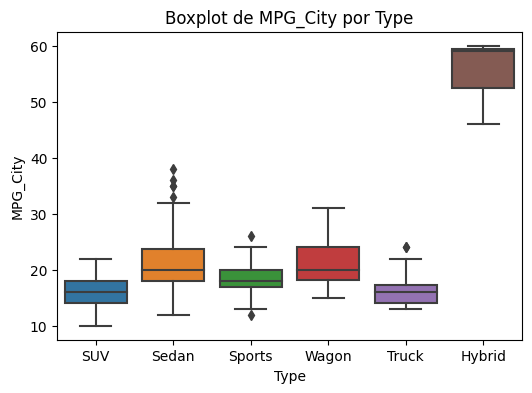

In [135]:
#EJEMPLO DE BOXPLOT CON MATPLOTLIB
#Acudimos a los datos
df = pd.DataFrame(df)
# Se crea el boxplot empelando Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='MPG_City', data=df)
plt.title('Boxplot de MPG_City por Type')
plt.xlabel('Type')
plt.ylabel('MPG_City')
plt.show()

Observación Type and MPG_City:

Podemos observar la alta eficiencia de millas por galón en ciudad para los autos de tipo Hybrid

In [136]:
#DriveTrain and MPG_City
fig = px.box(df, x="DriveTrain", y="MPG_City" ,color_discrete_sequence=["purple"],title="DriveTrain and MPG_City")
fig.show()

Observación DriveTrain and MPG_City:

Podemos observar que en DriveTrain Front posee la mayor cantidad de outliers con alta eficiencia de millas por galón en ciudad.

In [137]:
#Origin and MPG_City
fig = px.box(df, x="Origin", y="MPG_City", color_discrete_sequence=["green"],title="Origin and MPG_City")
fig.show()

Observación Origin and MPG_City:

Podemos observar que los autos originarios de Asia son aquellos con mayor eficiencia en millas por galón comparados con los

vehiculos de USA y Europe.


In [53]:
#Make and MPG_City
fig = px.box(df, x="Make", y="MPG_City", color_discrete_sequence=["gray"],title="Make and MPG_City")
fig.show()

Observación Make and MPG_City:

Podemos observar que las marcas de Honda y Toyota poseen un gran rendimiento de millas por galón en la ciudad.


## 3.2.2 Variables numéricas crear un scatter plot, explique cómo interpreta el gráfico

In [138]:
#EngineSize and MPG_City
fig = px.scatter(df, x="EngineSize", y="MPG_City",color_discrete_sequence=["green"],title="EngineSize and MPG_City")
fig .show()

Observación EngineSize and MPG_City:

Podemos observar entre menor tamaño tenga el motor, mayor es su eficiencia en millas por galon en ciudad, 

si su tamaño es muy grande su eficiencia decae.

In [139]:
#Cylinders and MPG_City
fig = px.scatter(df, x="Cylinders", y="MPG_City",color_discrete_sequence=["blue"],title="Cylinders and MPG_City")
fig .show()

Observación Cylinders and MPG_City:

Podemos observar los vehiculos que poseen entre 3 y 4 cilindros rinde mejor que los que tienen más

en cuanto a millas por galón.

In [59]:
#Horsepower and MPG_City
fig = px.scatter(df, x="Horsepower", y="MPG_City",color_discrete_sequence=["purple"],title="Horsepower and MPG_City")
fig .show()

Observación Horsepower and MPG_City:

Podemos observar que a mayor caballos de fuerza menor es su eficiencia en millas por galón en ciudad.

Y menor caballos de fuerza implica más eficiencia en millas por galón en ciudad.

In [60]:
#MPG_Highway and MPG_City
fig = px.scatter(df, x="MPG_Highway", y="MPG_City",color_discrete_sequence=["orange"],title="MPG_Highway and MPG_City")
fig .show()

Observación MPG_Highway and MPG_City:

Podemos observar que su comportamiento es similar, no obstante siempre en carretera se presenta mayor eficiencia que en ciudad.

In [61]:
#Weight and MPG_City
fig = px.scatter(df, x="Weight", y="MPG_City",color_discrete_sequence=["red"],title="Weight and MPG_City")
fig .show()

Observación Weight and MPG_City:

Podemos observar que a mayor peso del vehiculo menor es su rendimiento en millas por galon en ciudad.

A menor peso mejora su rendimiento en millas por galon en ciudad.

In [62]:
#Wheelbase and MPG_City
fig = px.scatter(df, x="Wheelbase", y="MPG_City",color_discrete_sequence=["gray"],title="Wheelbase and MPG_City")
fig .show()

Observación Wheelbase and MPG_City:

- Podemos observar que por lo general, tener una wheelbase alta perjudica su rendimiento en millas por galón,

    y tener una wheelbase baja tampoco asegura un buen rendimiento en millas por galón.

In [63]:
#Length and MPG_City
fig = px.scatter(df, x="Length", y="MPG_City",color_discrete_sequence=["green"],title="Length and MPG_City")
fig .show()

Observación Length and MPG_City:

Podemos observar que sucede un patrón similar al de "Wheelbase and MPG_City", por lo mismo, 

tener una lenght alta perjudica su rendimiento en millas por galón,

y tener una lenght baja tampoco asegura un buen rendimiento en millas por galón.

## 3.3 Matriz de correlación

## 3.3.1 Cree la matriz de correlación

Cuales son las variables más importantes para explicar la variabilidad de MPG_City. Explique por qué el coeficiente es negativo o positivo.

In [140]:
matriz = pd.DataFrame(df[["MSRP","Invoice","EngineSize","Horsepower","Cylinders","MPG_Highway","MPG_City"]])
matriz.corr()

,MSRP,Invoice,EngineSize,Horsepower,Cylinders,MPG_Highway,MPG_City
MSRP,1.000000,0.999132,0.571753,0.826945,0.649366,-0.439622,-0.475020
Invoice,0.999132,1.000000,0.564498,0.823746,0.644870,-0.434585,-0.470442
EngineSize,0.571753,0.564498,1.000000,0.787435,0.900702,-0.717302,-0.709471
Horsepower,0.826945,0.823746,0.787435,1.000000,0.810169,-0.647195,-0.676699
Cylinders,0.649366,0.644870,0.900702,0.810169,1.000000,-0.676035,-0.684356
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.647195,-0.676035,1.000000,0.941021
MPG_City,-0.475020,-0.470442,-0.709471,-0.676699,-0.684356,0.941021,1.000000


Los coeficientes de correlación varían de -1 a 1, 

- **Cerca de 0:** Si el coeficiente de correlación está muy cerca de 0 (tanto positivo como negativo), indica una correlación débil o prácticamente nula entre las variables.

- **Cerca de -0.5 o 0.5:** no presenta una relación con tanta fuerza.

- **Positivo(>0.5 a 1):** esto implica que si una variable aumente la otra también tiende a hacerlo.

- **Negativo(<-0.5 a -1):** esto implica que si una variable disminuye la otra también tiende a hacerlo.

## 3.3.2 

Cree las dummy variables para todas las variables categóricas y genere la matriz de correlación nuevamente.

¿Cuál es el valor de variable categórica con mayor correlación?


In [160]:
dummies_variablees = pd.DataFrame(df[["Make","Type","Origin","DriveTrain"]])
dummye = pd.get_dummies(dummies_variablees[["Make","Type","Origin","DriveTrain"]])
dummye.corr()

,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Ford,Make_GMC,Make_Honda,Make_Hummer,Make_Hyundai,Make_Infiniti,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_MINI,Make_Mazda,Make_Mercedes-Benz,Make_Mercury,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Pontiac,Make_Porsche,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Type_Hybrid,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
Make_Acura,1.000000,-0.027792,-0.028549,-0.018898,-0.017796,-0.033459,-0.024574,-0.022822,-0.030729,-0.017796,-0.026225,-0.006240,-0.021900,-0.017796,-0.008835,-0.021900,-0.010834,-0.020943,-0.010834,-0.020943,-0.018898,-0.008835,-0.020943,-0.032793,-0.018898,-0.022822,-0.026225,-0.010834,-0.020943,-0.016627,-0.016627,-0.017796,-0.008835,-0.020943,-0.017796,-0.034116,-0.024574,-0.021900,-0.010834,0.000992,0.027029,0.011490,-0.031428,-0.035402,0.168563,-0.081886,-0.093264,-0.022631,0.048108,-0.033684
Make_Audi,-0.027792,1.000000,-0.047720,-0.031589,-0.029746,-0.055927,-0.041076,-0.038147,-0.051363,-0.029746,-0.043835,-0.010430,-0.036607,-0.029746,-0.014768,-0.036607,-0.018108,-0.035006,-0.018108,-0.035006,-0.031589,-0.014768,-0.035006,-0.054814,-0.031589,-0.038147,-0.043835,-0.018108,-0.035006,-0.027792,-0.027792,-0.029746,-0.014768,-0.035006,-0.029746,-0.057025,-0.041076,-0.036607,-0.018108,-0.087030,0.031875,0.065012,-0.052533,0.029691,-0.164878,0.339401,-0.155891,0.218596,-0.068914,-0.126765
Make_BMW,-0.028549,-0.047720,1.000000,-0.032449,-0.030557,-0.057451,-0.042194,-0.039186,-0.052762,-0.030557,-0.045029,-0.010714,-0.037604,-0.030557,-0.015170,-0.037604,-0.018602,-0.035959,-0.018602,-0.035959,-0.032449,-0.015170,-0.035959,-0.056307,-0.032449,-0.039186,-0.045029,-0.018602,-0.035959,-0.028549,-0.028549,-0.030557,-0.015170,-0.035959,-0.030557,-0.058578,-0.042194,-0.037604,-0.018602,-0.025628,0.017199,0.059463,-0.053963,-0.017425,-0.169368,0.348644,-0.160137,0.018889,-0.234187,0.249780
Make_Buick,-0.018898,-0.031589,-0.032449,1.000000,-0.020227,-0.038030,-0.027931,-0.025940,-0.034926,-0.020227,-0.029807,-0.007093,-0.024892,-0.020227,-0.010042,-0.024892,-0.012313,-0.023804,-0.012313,-0.023804,-0.021480,-0.010042,-0.023804,-0.037272,-0.021480,-0.025940,-0.029807,-0.012313,-0.023804,-0.018898,-0.018898,-0.020227,-0.010042,-0.023804,-0.020227,-0.038776,-0.027931,-0.024892,-0.012313,0.034631,0.049818,-0.052698,-0.035721,-0.040238,-0.112114,-0.093072,0.202632,-0.037048,0.105939,-0.086198
Make_Cadillac,-0.017796,-0.029746,-0.030557,-0.020227,1.000000,-0.035812,-0.026302,-0.024427,-0.032889,-0.019048,-0.028069,-0.006679,-0.023440,-0.019048,-0.009457,-0.023440,-0.011595,-0.022416,-0.011595,-0.022416,-0.020227,-0.009457,-0.022416,-0.035099,-0.020227,-0.024427,-0.028069,-0.011595,-0.022416,-0.017796,-0.017796,-0.019048,-0.009457,-0.022416,-0.019048,-0.036515,-0.026302,-0.023440,-0.011595,0.043653,-0.031766,0.004557,0.041347,-0.037891,-0.105576,-0.087644,0.190816,-0.030222,0.026806,-0.002214
Make_Chevrolet,-0.033459,-0.055927,-0.057451,-0.038030,-0.035812,1.000000,-0.049452,-0.045926,-0.061837,-0.035812,-0.052773,-0.012557,-0.044071,-0.035812,-0.017780,-0.044071,-0.021801,-0.042144,-0.021801,-0.042144,-0.038030,-0.017780,-0.042144,-0.065991,-0.038030,-0.045926,-0.052773,-0.021801,-0.042144,-0.033459,-0.033459,-0.035812,-0.017780,-0.042144,-0.035812,-0.068653,-0.049452,-0.044071,-0.021801,0.005950,-0.030138,-0.032934,0.145619,-0.033598,-0.198498,-0.164783,0.358760,-0.018804,0.072057,-0.064642
Make_Chrysler,-0.024574,-0.041076,-0.042194,-0.027931,-0.026302,-0.049452,1.000000,-0.033730,-0.045416,-0.026302,-0.038759,-0.009223,-0.032368,-0.026302,-0.013058,-0.032368,-0.016012,-0.030953,-0.016012,-0.030953,-0.027931,-0.013058,-0.030953,-0.048467,-0.027931,-0.033730,-0.038759,-0.016012,-0.030953,-0.024574,-0.024574,-0.026302,-0.013058,-0.0

## 3.3.3 

Cree la matriz de correlación nuevamente removiendo todas las modelos de carro que fueron catalogados 
como un outlier.(Puede utilizar .query(). Existe alguna variacion en la correlación. 

In [148]:
df=outliers
matrizoutliers = pd.DataFrame(outliers)
matrizoutliers.corr()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
EngineSize,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
Cylinders,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
Horsepower,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
MPG_City,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
MPG_Highway,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
Weight,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
Wheelbase,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
Length,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
